# week4 事前課題1 アヤメの分類

## 【課題1】練習のために特徴量とカテゴリを選択

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

iris = load_iris()
#print(iris)

X = pd.DataFrame(iris.data,columns=iris.feature_names)
print(X.shape)

y = pd.DataFrame(iris.target,columns={'Species'})
#y[y['Species']==0]= 'setosa'
#y[y['Species']==1]= 'virgicolor' #名前 を 0,1,2 から setosa,virgicolor,virginica に変更
#y[y['Species']==2]= 'virginica'
print(y.shape)
print(iris.target_names)

df = pd.concat([X, y], axis=1)
print(df.shape)

(150, 4)
(150, 1)
['setosa' 'versicolor' 'virginica']
(150, 5)


In [2]:
# virgicolorとvirginica 抜き出し
df_2types = df[df['Species'].isin(['1','2'])]
print(df_2types.dtypes)

# sepal_lengthとpetal_length　抜き出し 
df_2by2 = df_2types.iloc[:,[0,2,4]]
display(df_2by2)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int64
dtype: object


,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## 【問題2】データの分析

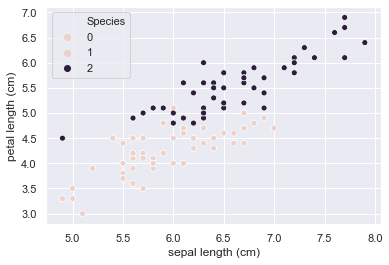

In [3]:
# 抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示

#縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', 
                hue='Species', data = df_2by2)
plt.show()

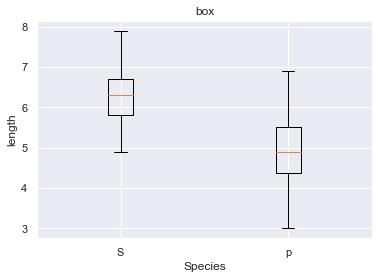

In [4]:
# 箱ひげ図
datas_each = (df_2by2['sepal length (cm)'],
              df_2by2['petal length (cm)'],) 
   
fig, ax = plt.subplots()

bp = ax.boxplot(datas_each)
ax.set_xticklabels('Species')
        
# タイトル名  
plt.title('box')    
plt.xlabel('Species')
plt.ylabel('length')

plt.show()

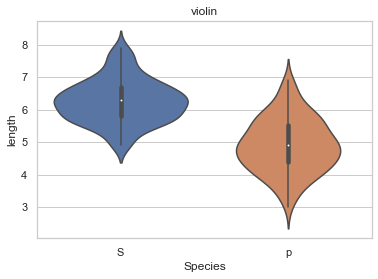

In [5]:
#特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
# バイオリン図
#sns.set(style='whitegrid')
#ax = sns.violinplot(data=datas_each)
        
sns.set(style='whitegrid')
ax = sns.violinplot(data=datas_each)
ax.set_xticklabels('Species')
    
# タイトル名
plt.title('violin')
plt.xlabel('Species')
plt.ylabel('length')
plt.show()

## 【問題3】前処理・訓練用データと検証用データの分割

> 訓練用データ75%、検証用データ25%として分割してください。
この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。
scikit-learnのtrain_test_split

In [6]:
#array = pd.DataFrame(iris.data,columns=iris.feature_names)
#a_train, a_test = train_test_split(array, test_size=0.25)

from sklearn.model_selection import train_test_split

a = pd.DataFrame(df_2by2,columns=['sepal length (cm)','petal length (cm)','Species'])
a_train, a_test = train_test_split(a, test_size=0.25)
print(a_train.shape)
print(a_test.shape)

#ndarray への変換. 特徴量X は1,2列目、正解yは３列目
X_train = a_train.iloc[:,:2].values
X_test = a_test.iloc[:,:2].values
y_train = a_train.iloc[:,-1].values
y_test = a_test.iloc[:,-1].values
#print(X_train)

(75, 3)
(25, 3)


## 【問題4】前処理・標準化
> 《注意点》
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証用データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train) #標準化は訓練用のデータでfit
print(scaler.mean_)

# 訓練用、検証用双方のデータにtransform。
X_train_std = scaler.transform(X_train)

X_test_std = scaler.transform(X_test)

[6.23333333 4.86266667]


## 【問題5】学習と推定
>最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。

>最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train_std, y_train)
Y_pred = neigh.predict(X_test)
neigh.score(X_test_std, y_test)

0.96

In [30]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_train_std, y_train)
Y_pred = neigh.predict(X_test)
neigh.score(X_test_std, y_test)

0.84

In [31]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train_std, y_train)
Y_pred = neigh.predict(X_test)
neigh.score(X_test_std, y_test)

0.96

In [32]:
neigh = KNeighborsClassifier(n_neighbors = 75)
neigh.fit(X_train_std, y_train)
Y_pred = neigh.predict(X_test)
neigh.score(X_test_std, y_test)

0.44

## 【問題6】評価
>2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。
- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

In [27]:
def scores(y_test, Y_pred):

    # Accuracy（正解率） *5nn
    from sklearn.metrics import accuracy_score
    print("accuracy_score:",accuracy_score(y_test, Y_pred)) # 5-nn

    # Precision（適合率）
    from sklearn.metrics import precision_score
    print("precision_score:",precision_score(y_test, Y_pred))

    # Recall（再現率）
    from sklearn.metrics import recall_score
    print("recall_score:",recall_score(y_test, Y_pred))

    # F値
    from sklearn.metrics import f1_score
    print("f1_score:",f1_score(y_test, Y_pred))
    
scores(y_test, Y_pred)

accuracy_score: 0.96
precision_score: 1.0
recall_score: 0.9090909090909091
f1_score: 0.9523809523809523


In [18]:
# 混同行列をscikit-learnを使い表示する
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, neigh.predict(X_test))

array([[10,  1],
       [ 0, 14]])

### 4種類の指標値の意味について簡単に調査して文章でまとめる
>(ans)
- 正解率 (Accuracy) とは、「本来ポジティブに分類すべきアイテムをポジティブに分類し、本来ネガティブに分類すべきアイテムをネガティブに分類できた割合」
- 精度 (Precision) とは、「ポジティブに分類されたアイテムのうち、実際にポジティブであったアイテムの割合」
- 検出率 (Recall) とは、「本来ポジティブに分類すべきアイテムを、正しくポジティブに分類できたアイテムの割合」
- F 値 (F-measure, F-score, F1 Score とも呼ばれます) とは、精度 (Precision) と検出率 (Recall) をバランス良く持ち合わせているかを示す指標です。つまり、精度は高くても、検出率が低いモデルでないか、逆に、検出率は高くても、精度が低くなっていないか、といった評価を示します。

(reference: https://pythondatascience.plavox.info/scikit-learn/分類結果のモデル評価)

## 【問題7】可視化
>散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練用データまたは検証用データを与えます。

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

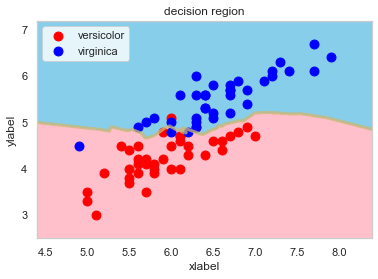

In [20]:
decision_region(X_train, y_train, model=neigh, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

In [21]:
print(y_train.shape)

(75,)


## 【問題8】他の手法の学習

>以下の全ての手法について学習・推定・評価・可視化を行ってください。
- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

In [43]:
def train_and_pred(X_train, y_train, X_test, y_test, model):
    #model インスタンス化
    m = model()
    #train
    m.fit(X_train, y_train)
    #predict
    Y_pred = m.predict(X_test)
    #scores 関数で評価
    scores(y_test, Y_pred)
    print("confusion_matrix",confusion_matrix(y_test, m.predict(X_test)))
    #可視化
    decision_region(X_train, y_train, model=m, step=0.01, title='decision region', 
                    xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

accuracy_score: 0.96
precision_score: 0.9166666666666666
recall_score: 1.0
f1_score: 0.9565217391304348
confusion_matrix [[11  0]
 [ 1 13]]


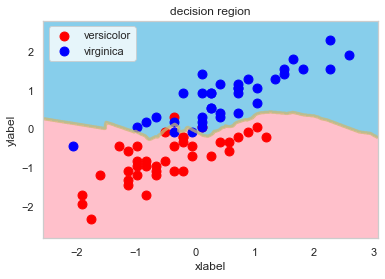

In [44]:
#最近傍法
train_and_pred(X_train_std, y_train, X_test_std, y_test, model= KNeighborsClassifier)

/Users/akishimasaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy_score: 0.96
precision_score: 1.0
recall_score: 0.9090909090909091
f1_score: 0.9523809523809523
confusion_matrix [[10  1]
 [ 0 14]]


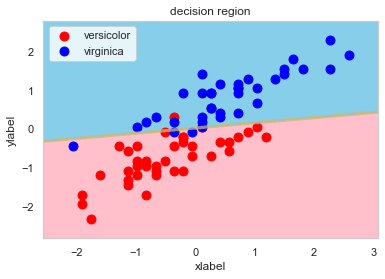

In [45]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
train_and_pred(X_train_std, y_train, X_test_std, y_test, model= LogisticRegression)

accuracy_score: 0.96
precision_score: 1.0
recall_score: 0.9090909090909091
f1_score: 0.9523809523809523
confusion_matrix [[10  1]
 [ 0 14]]


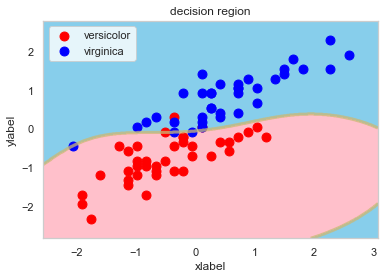

In [46]:
# SVM
from sklearn.svm import SVC
train_and_pred(X_train_std, y_train, X_test_std, y_test, model= SVC)

accuracy_score: 0.92
precision_score: 1.0
recall_score: 0.8181818181818182
f1_score: 0.9
confusion_matrix [[ 9  2]
 [ 0 14]]


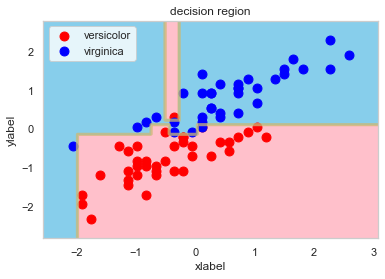

In [47]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
train_and_pred(X_train_std, y_train, X_test_std, y_test, model= DecisionTreeClassifier)

/Users/akishimasaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score: 0.96
precision_score: 1.0
recall_score: 0.9090909090909091
f1_score: 0.9523809523809523
confusion_matrix [[10  1]
 [ 0 14]]


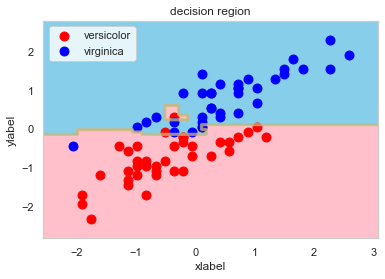

In [49]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
train_and_pred(X_train_std, y_train, X_test_std, y_test, model= RandomForestClassifier)

>その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

- accuracy_score は決定木以外0.96と高かった。
- precision_score は全ての手法で1.0で差はなかった。
- recall_score は最近傍法が一番よく1.0だった。
- f1_score は決定木以外0.95と高かった。
- 決定領域は決定木、ランダムフォレストで過学習の傾向が見られた。

## 【問題9】（アドバンス課題）標準化の有無の比較

## 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
>指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。
決定領域を可視化する前述の関数は適切に書き換える必要があります。